
A Confirmation that all columns and cells are completely filled,there are no empty cells and data is in exact type :

feature_name                                numbe_of_missing_values
LSOAcode2011                                             0
LSOAname                                                 0
YearendingDec1995                                        0
YearendingDec1996                                        0
YearendingDec1997                                        0
YearendingDec1998                                        0
YearendingDec1999                                        0
YearendingDec2000                                        0
YearendingDec2001                                        0
YearendingDec2002                                        0
YearendingDec2003                                        0
YearendingDec2004                                        0
YearendingDec2005                                        0
YearendingDec2006                             

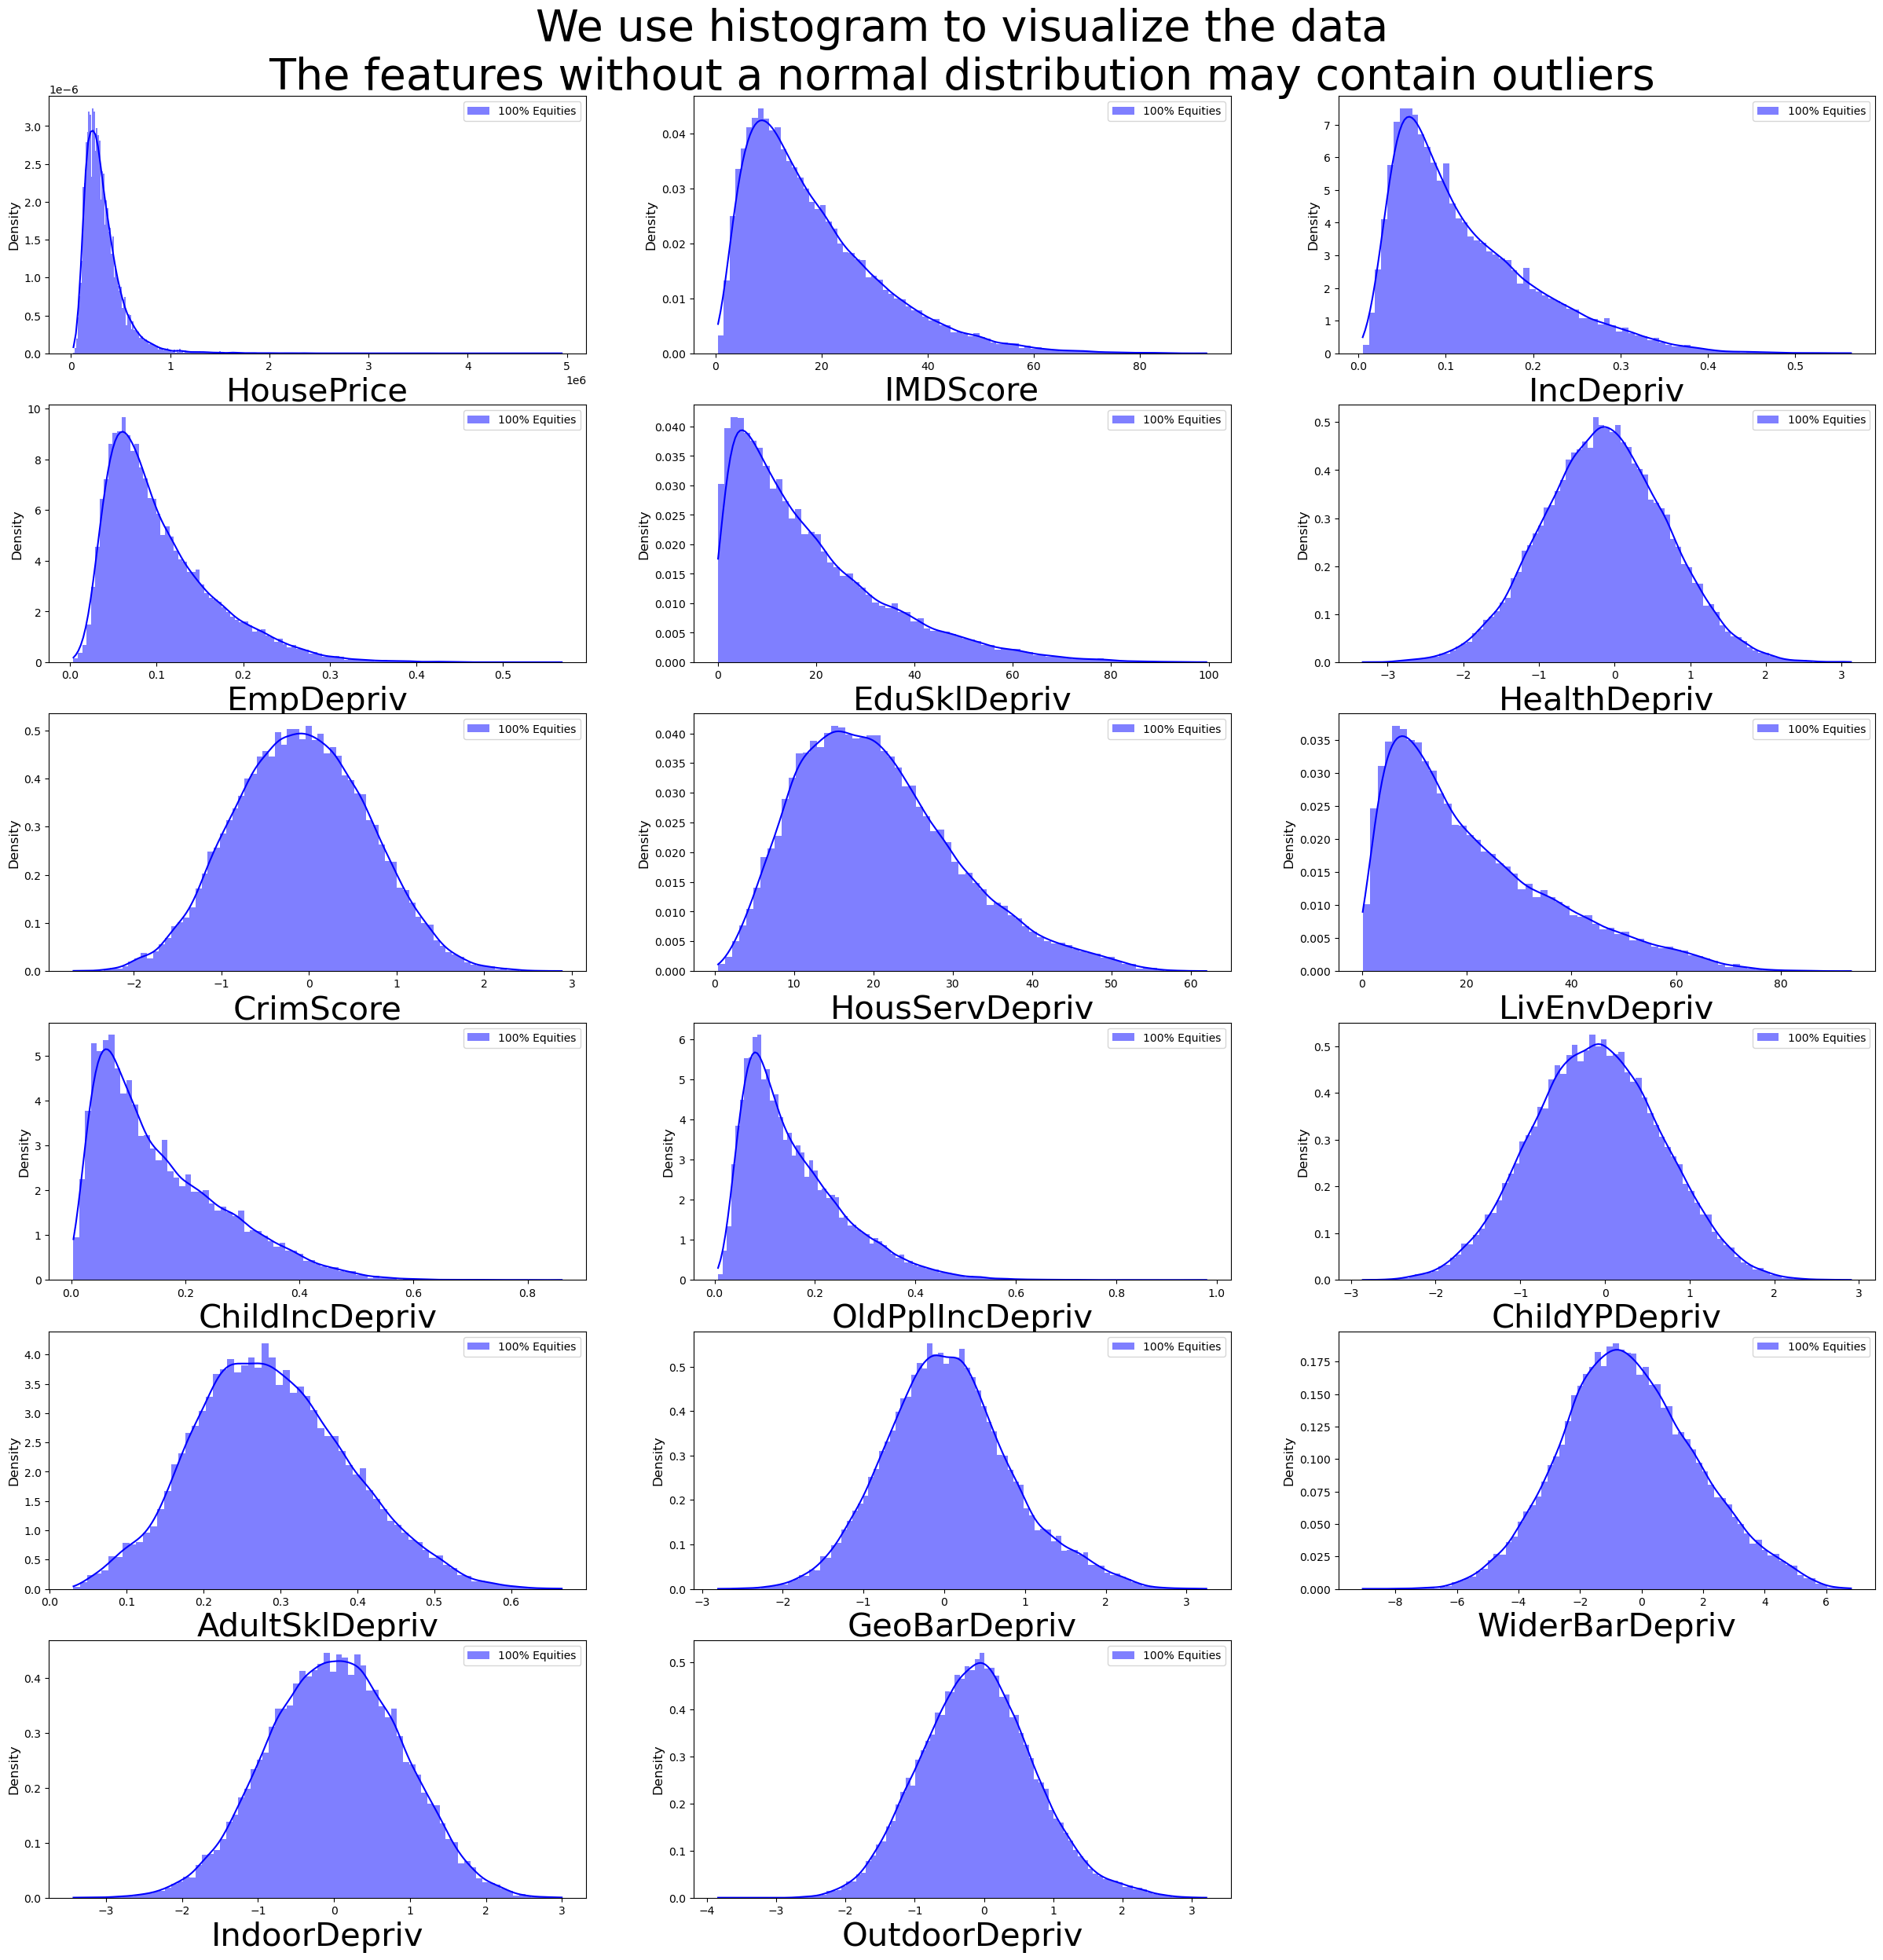

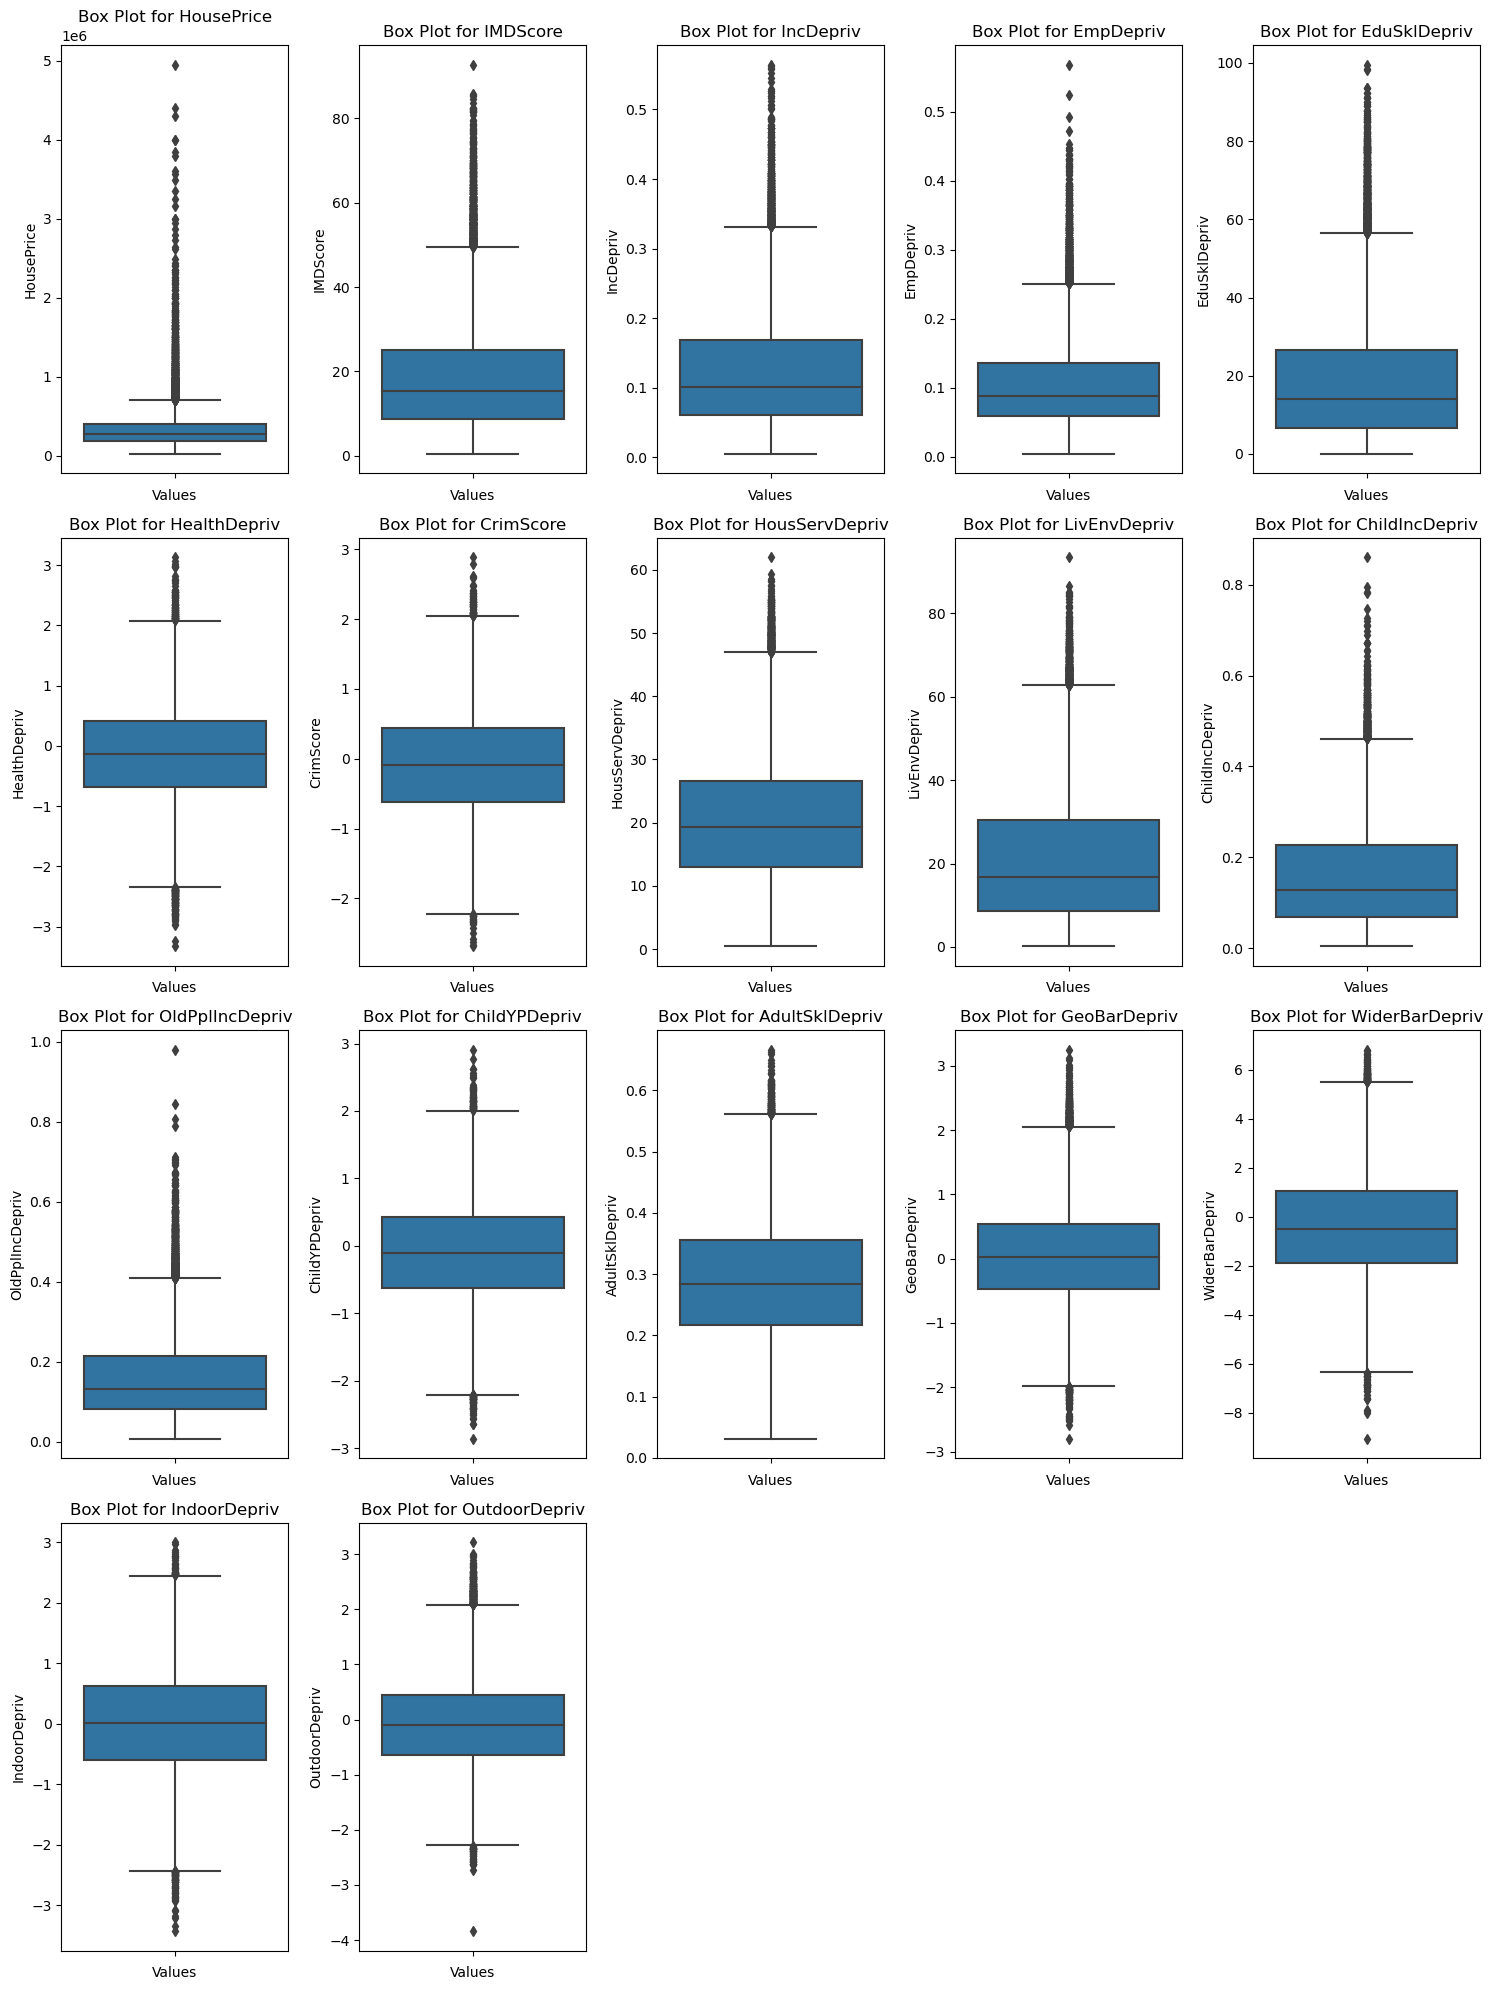

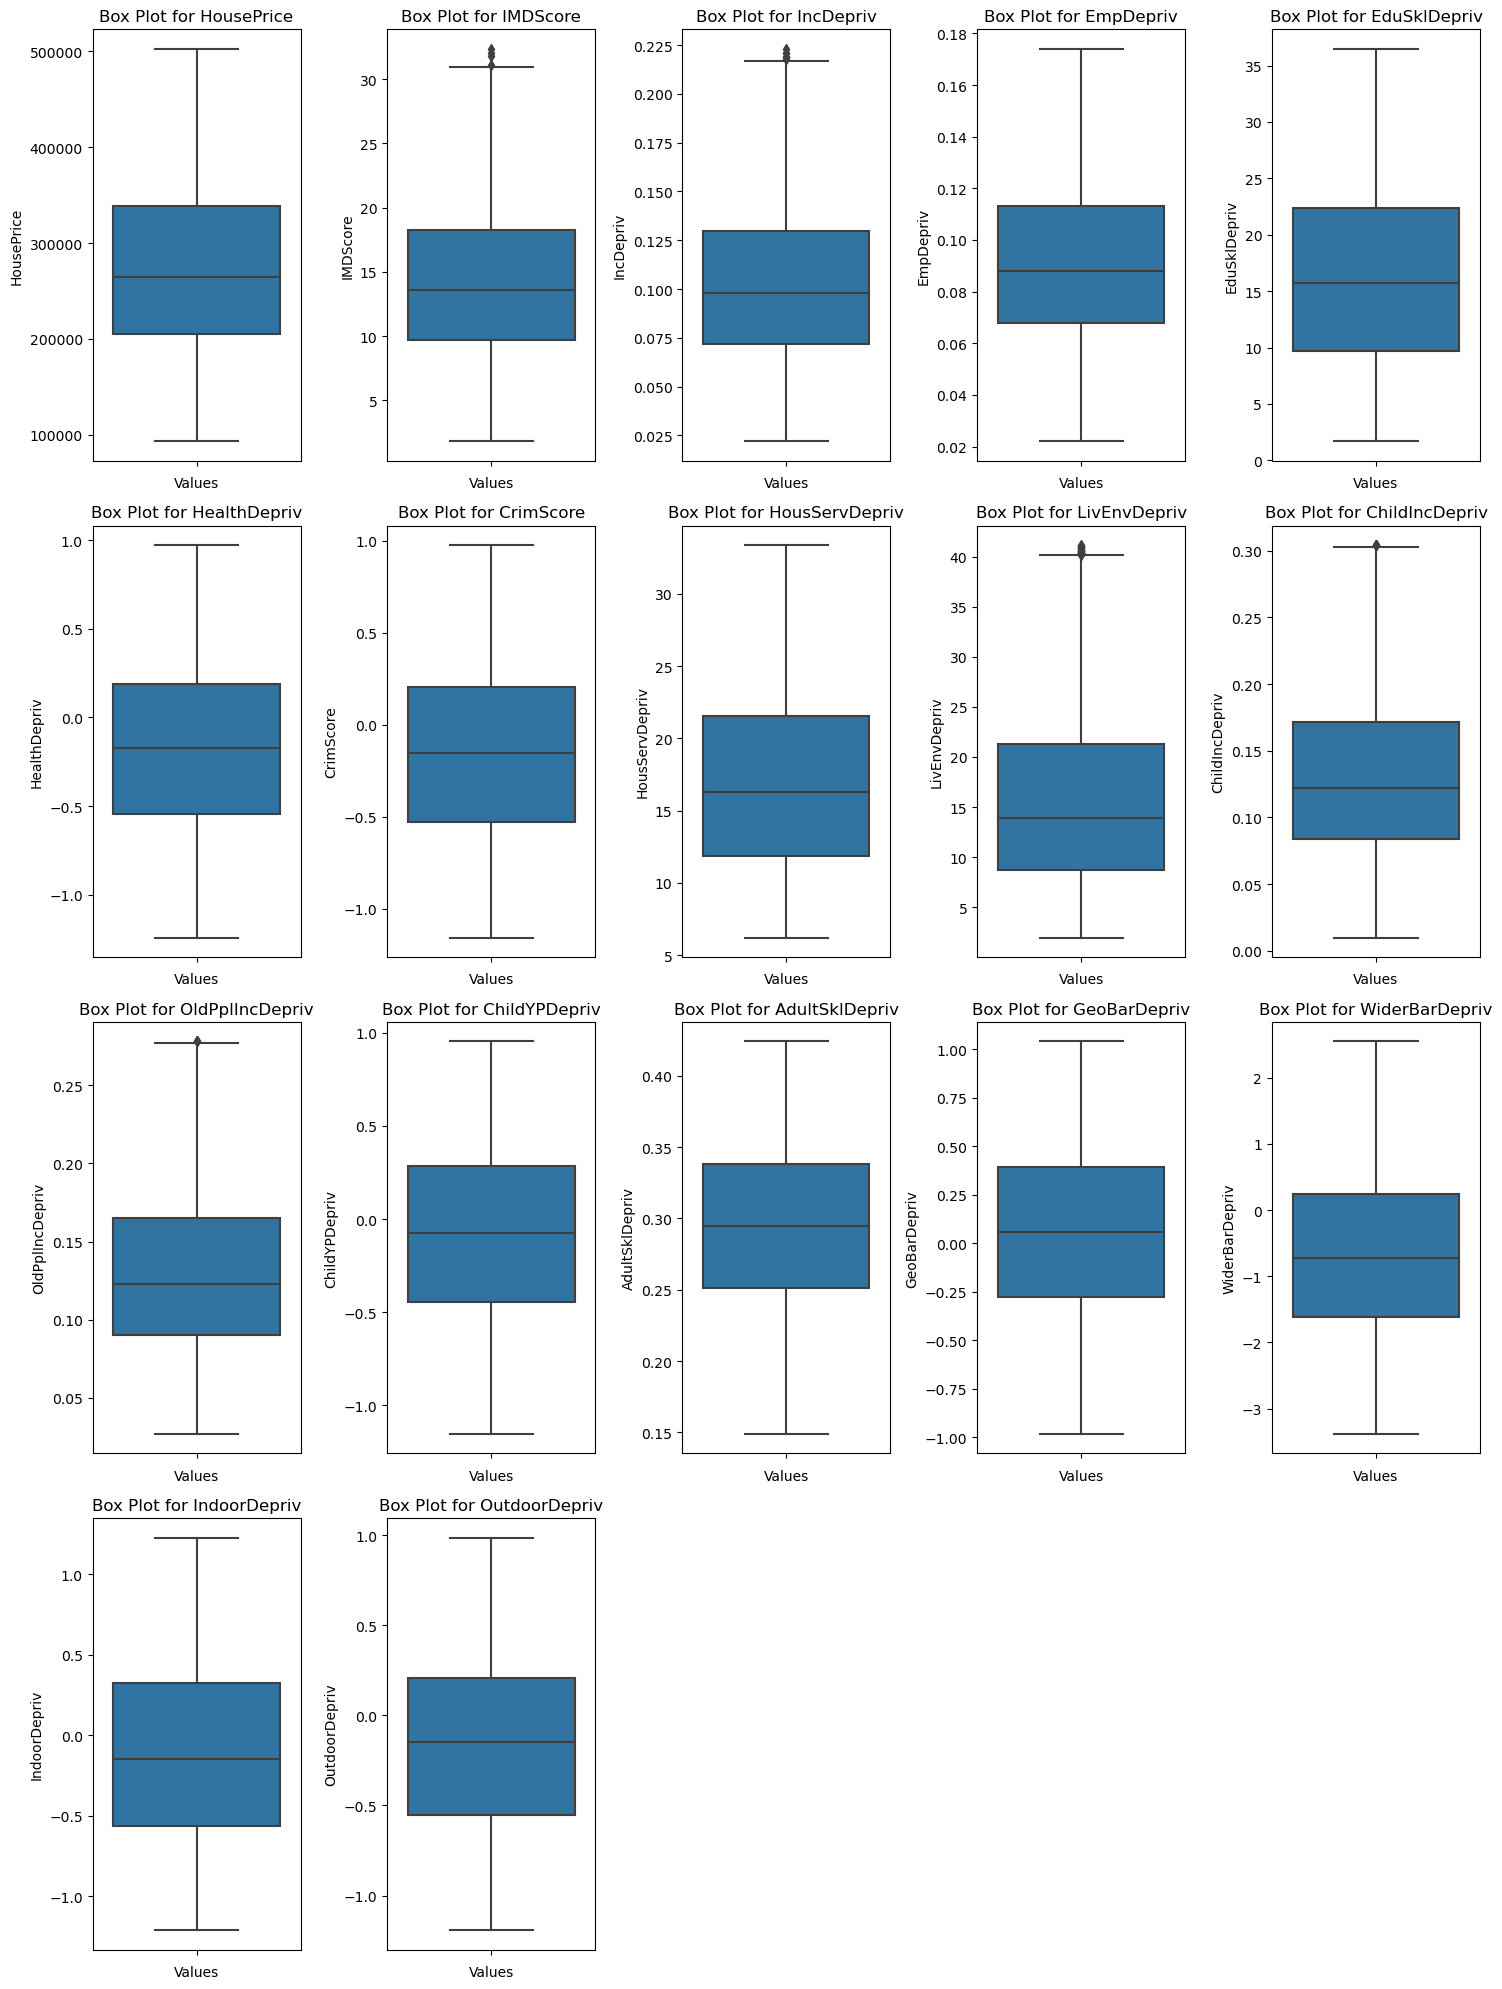

finished preprocessing.....


In [1]:
#Run preprocessing Notebook
#To see the sets in preprocessing please view preprocessing notebook
%run HPP_Preprocessing.ipynb
#The variables we would use from this notebook are featuresNormalized (contains all features normalized) & dfp (normalized dataframe)

# Building the decision tree using the default hyperparameters

In [2]:
#we make use of only normalize columns thats why you see we use the _n only
#These are the independent features
#independent_columns = ['IMDScore_n', 'IncDepriv_n', 'EmpDepriv_n', 'EduSklDepriv_n', 'HealthDepriv_n', 'CrimScore_n', 'HousServDepriv_n', 'LivEnvDepriv_n', 'ChildIncDepriv_n', 'OldPplIncDepriv_n', 'ChildYPDepriv_n', 'AdultSklDepriv_n', 'GeoBarDepriv_n', 'WiderBarDepriv_n', 'IndoorDepriv_n', 'OutdoorDepriv_n']
# House price is target column
#target_column = 'HousePrice_n'
#Here we do not use normalized values
independent_columns = ['IMDScore', 'IncDepriv', 'EmpDepriv', 'EduSklDepriv', 'HealthDepriv', 'CrimScore', 'HousServDepriv', 'LivEnvDepriv', 'ChildIncDepriv', 'OldPplIncDepriv', 'ChildYPDepriv', 'AdultSklDepriv', 'GeoBarDepriv', 'WiderBarDepriv', 'IndoorDepriv', 'OutdoorDepriv']
# House price is target column
target_column = 'HousePrice'
#independent_columns =['HealthDepriv','OutdoorDepriv','AdultSklDepriv','WiderBarDepriv'] 

X = dfp[independent_columns]  # Features
y = dfp[target_column]  # Target variable

from sklearn.model_selection import train_test_split
# Split data into 80% training and 20% testing sets
X_train, X_test, y_train,
.,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
# Create the regressor with default parameters
regressor = DecisionTreeRegressor(random_state=80)


# Train the model on the training data
regressor.fit(X_train, y_train)


# Predict using the trained model on the test data
y_pred = regressor.predict(X_test)
  -

# Evaluating the Random forest tree (the default hyperparameters)- Overfitting detected

In [3]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

import numpy as np
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Overfitting spotted Train- accuracy of 1 indicates overfitted model
print (f'Train Accuracy - : {regressor.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {regressor.score(X_test,y_test):.3f}')

Mean Squared Error: 8320337696.472537
Mean Absolute Error: 70416.58555259653
R-squared: 0.0021649432795536327
Root Mean Squared Error: 91215.88511039366
Train Accuracy - : 1.000
Test Accuracy - : 0.002


# Checking feature importance of decision tree (with default hyperparameters)

In [4]:
# Get the feature importance scores
feature_importance = regressor.feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


            Feature  Importance
4      HealthDepriv    0.341640
13   WiderBarDepriv    0.126652
14     IndoorDepriv    0.079329
11   AdultSklDepriv    0.060315
7      LivEnvDepriv    0.041716
15    OutdoorDepriv    0.040612
10    ChildYPDepriv    0.040336
5         CrimScore    0.037496
3      EduSklDepriv    0.036969
6    HousServDepriv    0.030195
2         EmpDepriv    0.030001
0          IMDScore    0.029381
12     GeoBarDepriv    0.028419
8    ChildIncDepriv    0.027671
1         IncDepriv    0.024955
9   OldPplIncDepriv    0.024312


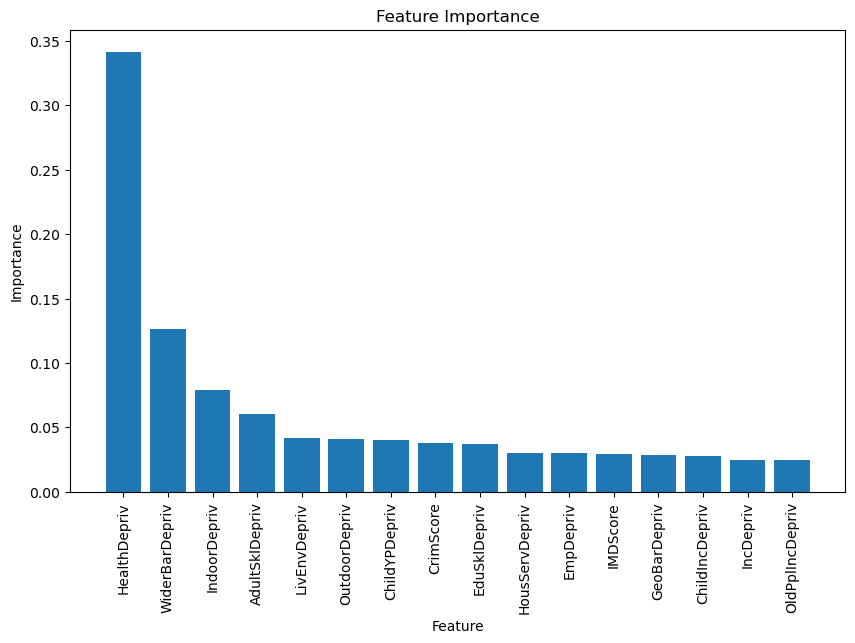

In [5]:
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


# Building the decision tree (hyperparameter tuned)

In [9]:
# Hyperparameter tuning using randomizedSearchCv
from sklearn.model_selection import RandomizedSearchCV

#Hyper parameters to be randomly tested
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('squared_error', 'friedman_mse','absolute_error','poisson')
              , 'max_features' : ('sqrt', 'log2')
              , 'min_samples_split' : (2,4,6,8,10,12,14,16,18,20)
              ,'splitter' : ('best', 'random')
             }

from sklearn.tree import DecisionTreeRegressor
#we still maintain a random state of 42.
DT_grid  = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_distributions = parameters, cv = 5, verbose = True)
#Fitting the raandom hyperparameters into  RandomizedSearchCV class
DT_grid.fit(X_train,y_train)




Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'criterion': ('squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('sqrt', 'log2'),
                                        'min_samples_split': (2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20),
                                        'splitter': ('best', 'random')},
                   verbose=True)

In [12]:
#Now checking the best estimator
best_estimator = DT_grid.best_estimator_
#Now checking the best accuracy score
best_accuracy = DT_grid.best_score_

print(best_estimator)
print(best_accuracy)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=9,
                      max_features='sqrt', min_samples_split=18,
                      random_state=42)
0.2943059538808045


# Building 4 decision tree models (hyperparameter tuned)

In [13]:
#Model 1
regressor1 = DecisionTreeRegressor(criterion='poisson', max_depth=9, max_features='sqrt',
                      min_samples_split=6, random_state=42)
#Fit Model 1
regressor1.fit(X_train,y_train)


#----------------------------------------------------------------------------------------------------------
#Model 2
regressor2 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=9,
                      max_features=1.0, min_samples_split=4, splitter='random',random_state=42)

#Fit Model 2
regressor2.fit(X_train,y_train)

#----------------------------------------------------------------------------------------------------------
#Model 3
regressor3 = DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features='sqrt',
                      min_samples_split=12, random_state=42)

#Fit Model 3
regressor3.fit(X_train,y_train)

#----------------------------------------------------------------------------------------------------------
#Model 4
regressor4 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                      max_features='log2', min_samples_split=8, random_state=42)

#Fit Model 4
regressor4.fit(X_train,y_train)






models = [regressor1,regressor2,regressor3,regressor4]

# Now lets look at the accuracy for each decision tree model

In [14]:
modelNumber = 1
for model in models:
    print("For model "+str(modelNumber))
    print (f'Train Accuracy - : {model.score(X_train,y_train):.3f}')
    print (f'Test Accuracy - : {model.score(X_test,y_test):.3f}')
    print("----------------------------------------")
    modelNumber += 1

For model 1
Train Accuracy - : 0.616
Test Accuracy - : 0.267
----------------------------------------
For model 2
Train Accuracy - : 0.526
Test Accuracy - : 0.334
----------------------------------------
For model 3
Train Accuracy - : 0.630
Test Accuracy - : 0.221
----------------------------------------
For model 4
Train Accuracy - : 0.488
Test Accuracy - : 0.338
----------------------------------------


# Now lets look at the MSE & R-Squared Value for each decision tree model

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

modelNumber = 1
for model in models:
    print("For model "+str(modelNumber))
    # Predict using the trained model 2 on the test data
    y_pred = model.predict(X_test)
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    import numpy as np
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error:", rmse)
    print("----------------------------------------")
    modelNumber += 1

For model 1
Mean Squared Error: 6110484724.920184
R-squared: 0.2671864899587999
Root Mean Squared Error: 78169.58951485023
----------------------------------------
For model 2
Mean Squared Error: 5550564965.049771
R-squared: 0.33433611605944
Root Mean Squared Error: 74502.11382940602
----------------------------------------
For model 3
Mean Squared Error: 6493921501.940824
R-squared: 0.22120197922081586
Root Mean Squared Error: 80584.87142101068
----------------------------------------
For model 4
Mean Squared Error: 5520871451.229552
R-squared: 0.33789717693556154
Root Mean Squared Error: 74302.56692221038
----------------------------------------


# The feature importance score and visualization for model 1

            Feature  Importance
4      HealthDepriv    0.224277
0          IMDScore    0.201473
13   WiderBarDepriv    0.114008
2         EmpDepriv    0.081303
6    HousServDepriv    0.066426
12     GeoBarDepriv    0.054971
14     IndoorDepriv    0.052257
11   AdultSklDepriv    0.041858
7      LivEnvDepriv    0.034806
15    OutdoorDepriv    0.030300
10    ChildYPDepriv    0.024382
8    ChildIncDepriv    0.020489
1         IncDepriv    0.017110
9   OldPplIncDepriv    0.014209
3      EduSklDepriv    0.012626
5         CrimScore    0.009506


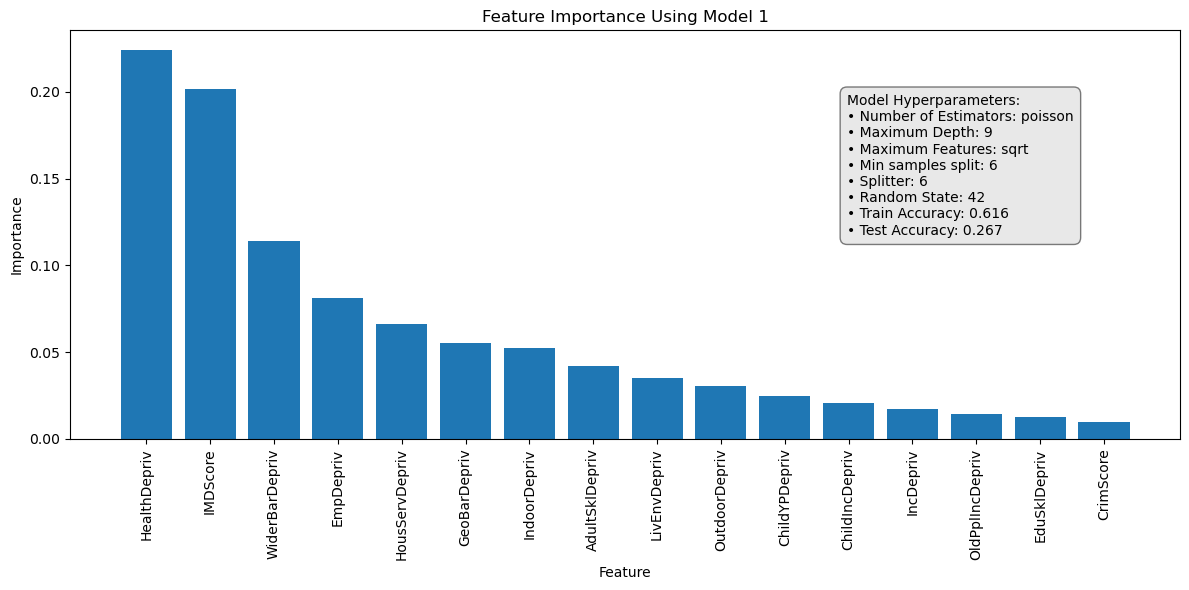

In [16]:
# Get the feature importance scores for model 1
modelIndex = 0
feature_importance = models[modelIndex].feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Placeholder for model hyperparameters used
model_hyperparameters = {
    'criterion': models[modelIndex].criterion,
    'max_depth': models[modelIndex].max_depth,
    'max_features': models[modelIndex].max_features,
    'min_samples_split': models[modelIndex].min_samples_split,
    'splitter': models[modelIndex].min_samples_split,
    'random_state': models[modelIndex].random_state,
    'train_accuracy' : round(models[modelIndex].score(X_train,y_train),3),
    'test_accuracy': round(models[modelIndex].score(X_test,y_test),3)
    # Add more hyperparameters if needed
}


# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Using Model '+str(modelIndex+1))
plt.xticks(rotation=90)

# Adding bullet points for model hyperparameters on the right side of the plot
bullet_points = [
    f"Model Hyperparameters:",
    f"• Number of Estimators: {model_hyperparameters['criterion']}",
    f"• Maximum Depth: {model_hyperparameters['max_depth']}",
    f"• Maximum Features: {model_hyperparameters['max_features']}",
    f"• Min samples split: {model_hyperparameters['min_samples_split']}",
    f"• Splitter: {model_hyperparameters['splitter']}",
    f"• Random State: {model_hyperparameters['random_state']}",
    f"• Train Accuracy: {model_hyperparameters['train_accuracy']}",
    f"• Test Accuracy: {model_hyperparameters['test_accuracy']}",
    
    # Add more hyperparameters if needed
]


# Display the bullet points
plt.text(0.7, 0.5, "\n".join(bullet_points), transform=plt.gca().transAxes,
         bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()


# The feature importance score and visualization for model 2

            Feature  Importance
4      HealthDepriv    0.331699
2         EmpDepriv    0.244788
13   WiderBarDepriv    0.172946
14     IndoorDepriv    0.073790
11   AdultSklDepriv    0.036282
7      LivEnvDepriv    0.025827
10    ChildYPDepriv    0.021259
3      EduSklDepriv    0.017123
12     GeoBarDepriv    0.011378
6    HousServDepriv    0.011099
8    ChildIncDepriv    0.010626
9   OldPplIncDepriv    0.010240
15    OutdoorDepriv    0.008981
1         IncDepriv    0.008659
5         CrimScore    0.008177
0          IMDScore    0.007128


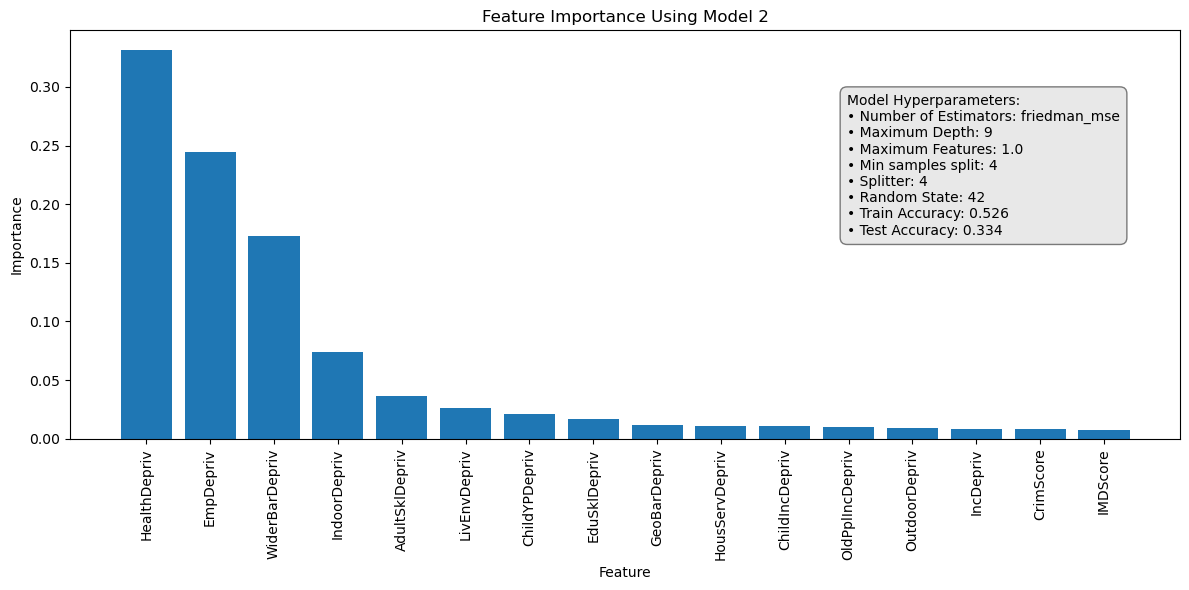

In [17]:
# Get the feature importance scores for model 2
modelIndex = 1
feature_importance = models[modelIndex].feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Placeholder for model hyperparameters used
model_hyperparameters = {
    'criterion': models[modelIndex].criterion,
    'max_depth': models[modelIndex].max_depth,
    'max_features': models[modelIndex].max_features,
    'min_samples_split': models[modelIndex].min_samples_split,
    'splitter': models[modelIndex].min_samples_split,
    'random_state': models[modelIndex].random_state,
    'train_accuracy' : round(models[modelIndex].score(X_train,y_train),3),
    'test_accuracy': round(models[modelIndex].score(X_test,y_test),3)
    # Add more hyperparameters if needed
}


# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Using Model '+str(modelIndex+1))
plt.xticks(rotation=90)

# Adding bullet points for model hyperparameters on the right side of the plot
bullet_points = [
    f"Model Hyperparameters:",
    f"• Number of Estimators: {model_hyperparameters['criterion']}",
    f"• Maximum Depth: {model_hyperparameters['max_depth']}",
    f"• Maximum Features: {model_hyperparameters['max_features']}",
    f"• Min samples split: {model_hyperparameters['min_samples_split']}",
    f"• Splitter: {model_hyperparameters['splitter']}",
    f"• Random State: {model_hyperparameters['random_state']}",
    f"• Train Accuracy: {model_hyperparameters['train_accuracy']}",
    f"• Test Accuracy: {model_hyperparameters['test_accuracy']}",
    
    # Add more hyperparameters if needed
]


# Display the bullet points
plt.text(0.7, 0.5, "\n".join(bullet_points), transform=plt.gca().transAxes,
         bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()


# The feature importance score and visualization for model 3

            Feature  Importance
0          IMDScore    0.205162
4      HealthDepriv    0.177159
6    HousServDepriv    0.111807
13   WiderBarDepriv    0.088793
14     IndoorDepriv    0.070550
12     GeoBarDepriv    0.058722
2         EmpDepriv    0.054444
15    OutdoorDepriv    0.044676
11   AdultSklDepriv    0.033713
3      EduSklDepriv    0.030741
10    ChildYPDepriv    0.026421
7      LivEnvDepriv    0.025663
8    ChildIncDepriv    0.021854
9   OldPplIncDepriv    0.019491
5         CrimScore    0.015483
1         IncDepriv    0.015321


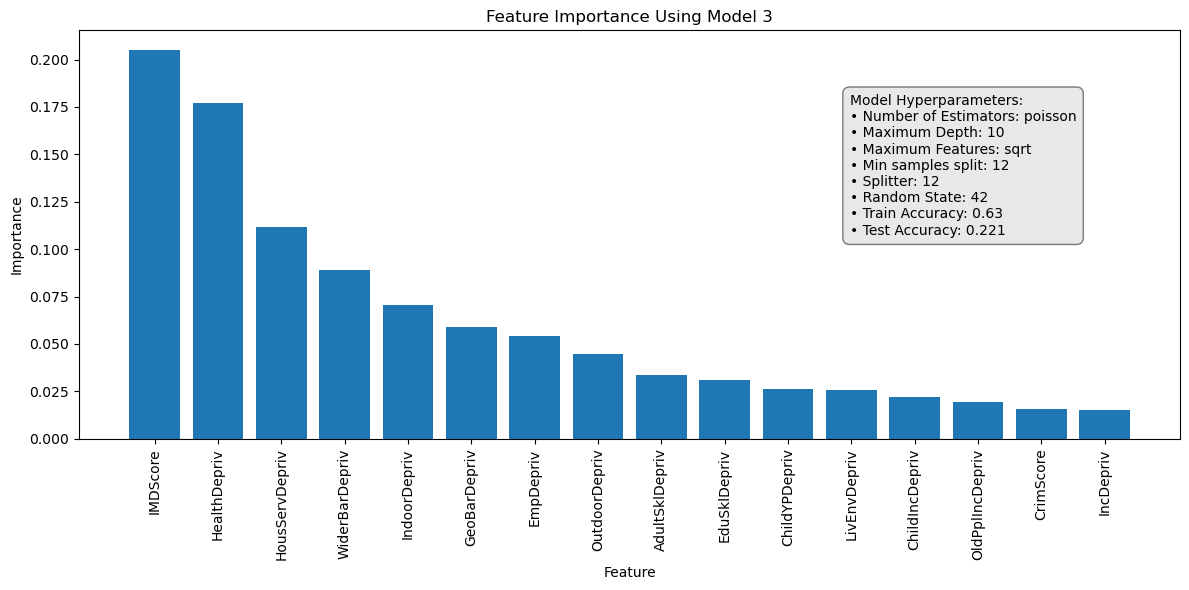

In [18]:
# Get the feature importance scores for model 2
modelIndex = 2
feature_importance = models[modelIndex].feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Placeholder for model hyperparameters used
model_hyperparameters = {
    'criterion': models[modelIndex].criterion,
    'max_depth': models[modelIndex].max_depth,
    'max_features': models[modelIndex].max_features,
    'min_samples_split': models[modelIndex].min_samples_split,
    'splitter': models[modelIndex].min_samples_split,
    'random_state': models[modelIndex].random_state,
    'train_accuracy' : round(models[modelIndex].score(X_train,y_train),3),
    'test_accuracy': round(models[modelIndex].score(X_test,y_test),3)
    # Add more hyperparameters if needed
}


# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Using Model '+str(modelIndex+1))
plt.xticks(rotation=90)

# Adding bullet points for model hyperparameters on the right side of the plot
bullet_points = [
    f"Model Hyperparameters:",
    f"• Number of Estimators: {model_hyperparameters['criterion']}",
    f"• Maximum Depth: {model_hyperparameters['max_depth']}",
    f"• Maximum Features: {model_hyperparameters['max_features']}",
    f"• Min samples split: {model_hyperparameters['min_samples_split']}",
    f"• Splitter: {model_hyperparameters['splitter']}",
    f"• Random State: {model_hyperparameters['random_state']}",
    f"• Train Accuracy: {model_hyperparameters['train_accuracy']}",
    f"• Test Accuracy: {model_hyperparameters['test_accuracy']}",
    
    # Add more hyperparameters if needed
]


# Display the bullet points
plt.text(0.7, 0.5, "\n".join(bullet_points), transform=plt.gca().transAxes,
         bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()


# The feature importance score and visualization for model 4

            Feature  Importance
4      HealthDepriv    0.259660
0          IMDScore    0.231499
13   WiderBarDepriv    0.181287
2         EmpDepriv    0.086530
14     IndoorDepriv    0.051111
6    HousServDepriv    0.033783
7      LivEnvDepriv    0.025042
3      EduSklDepriv    0.024908
15    OutdoorDepriv    0.022048
11   AdultSklDepriv    0.021376
12     GeoBarDepriv    0.019684
10    ChildYPDepriv    0.017949
1         IncDepriv    0.016719
5         CrimScore    0.004541
8    ChildIncDepriv    0.003862
9   OldPplIncDepriv    0.000000


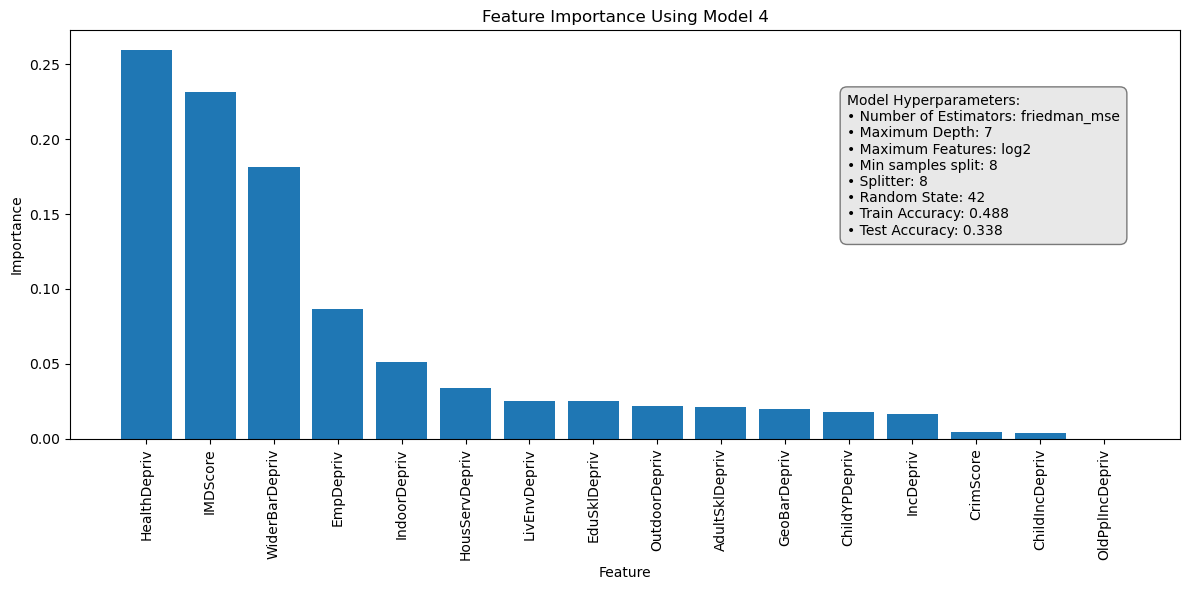

In [19]:
# Get the feature importance scores for model 4
modelIndex = 3
feature_importance = models[modelIndex].feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Placeholder for model hyperparameters used
model_hyperparameters = {
    'criterion': models[modelIndex].criterion,
    'max_depth': models[modelIndex].max_depth,
    'max_features': models[modelIndex].max_features,
    'min_samples_split': models[modelIndex].min_samples_split,
    'splitter': models[modelIndex].min_samples_split,
    'random_state': models[modelIndex].random_state,
    'train_accuracy' : round(models[modelIndex].score(X_train,y_train),3),
    'test_accuracy': round(models[modelIndex].score(X_test,y_test),3)
    # Add more hyperparameters if needed
}


# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Using Model '+str(modelIndex+1))
plt.xticks(rotation=90)

# Adding bullet points for model hyperparameters on the right side of the plot
bullet_points = [
    f"Model Hyperparameters:",
    f"• Number of Estimators: {model_hyperparameters['criterion']}",
    f"• Maximum Depth: {model_hyperparameters['max_depth']}",
    f"• Maximum Features: {model_hyperparameters['max_features']}",
    f"• Min samples split: {model_hyperparameters['min_samples_split']}",
    f"• Splitter: {model_hyperparameters['splitter']}",
    f"• Random State: {model_hyperparameters['random_state']}",
    f"• Train Accuracy: {model_hyperparameters['train_accuracy']}",
    f"• Test Accuracy: {model_hyperparameters['test_accuracy']}",
    
    # Add more hyperparameters if needed
]


# Display the bullet points
plt.text(0.7, 0.5, "\n".join(bullet_points), transform=plt.gca().transAxes,
         bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()


# We select model 2 as the best model and build the tree again using normalized values

In [39]:
#Now using normalized values
independent_columns = ['IMDScore_n', 'IncDepriv_n', 'EmpDepriv_n', 'EduSklDepriv_n', 'HealthDepriv_n', 'CrimScore_n', 'HousServDepriv_n', 'LivEnvDepriv_n', 'ChildIncDepriv_n', 'OldPplIncDepriv_n', 'ChildYPDepriv_n', 'AdultSklDepriv_n', 'GeoBarDepriv_n', 'WiderBarDepriv_n', 'IndoorDepriv_n', 'OutdoorDepriv_n']
# House price is target column
target_column = 'HousePrice_n'

X_n = dfp[independent_columns]  #Features
y_n = dfp[target_column]  # Target variable

from sklearn.model_selection import train_test_split
# Split data into 80% training and 20% testing sets
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
# Create the regressor with default parameters
regressor_final_n = DecisionTreeRegressor(criterion='friedman_mse', max_depth=9, max_features=1.0, min_samples_split=4, splitter='random',random_state=42)


# Train the model on the training data
regressor_final_n.fit(X_train_n, y_train_n)
# Predict using the trained model on the test data
y_pred_final_n = regressor_final_n.predict(X_test_n)




In [40]:
#Now using Not normalized values
independent_columns = ['IMDScore', 'IncDepriv', 'EmpDepriv', 'EduSklDepriv', 'HealthDepriv', 'CrimScore', 'HousServDepriv', 'LivEnvDepriv', 'ChildIncDepriv', 'OldPplIncDepriv', 'ChildYPDepriv', 'AdultSklDepriv', 'GeoBarDepriv', 'WiderBarDepriv', 'IndoorDepriv', 'OutdoorDepriv']
# House price is target column
target_column = 'HousePrice'

X = dfp[independent_columns]  #Features
y = dfp[target_column]  # Target variable

from sklearn.model_selection import train_test_split
# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
# Create the regressor with default parameters
regressor_final = DecisionTreeRegressor(criterion='friedman_mse', max_depth=9, max_features=1.0, min_samples_split=4, splitter='random',random_state=42)


# Train the model on the training data
regressor_final.fit(X_train, y_train)
# Predict using the trained model on the test data
y_pred_final = regressor_final.predict(X_test)

In [50]:
print("my predicted normalized values")
print(y_pred_final_n)
print("\nmy predicted Not normalized values")
print(y_pred_final)

my predicted normalized values
[0.55849836 0.40447004 0.54439139 ... 0.20902057 0.54439139 0.66926982]

my predicted Not normalized values
[321815.45454545 258779.36327078 316042.17708333 ... 178791.66666667
 316042.17708333 367148.67307692]


In [41]:
from scipy.stats import ttest_rel

# Calculate the differences between the predicted values of the two models
prediction_differences = y_pred_final_n - y_pred_final

# Perform a paired t-test
t_statistic, p_value = ttest_rel(y_pred_final_n, y_pred_final)

# Print the results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Compare the p-value to the alpha value (0.05)
if p_value < 0.05:
    print("The differences between the models' predictions are statistically significant.")
else:
    print("The differences between the models' predictions are not statistically significant.")


T-Statistic: -163.5782
P-Value: 0.0000
The differences between the models' predictions are statistically significant.


In [35]:
print(y_pred_final_n)


[321815.45454545 258779.36327078 316042.17708333 ... 178791.66666667
 316042.17708333 367148.67307692]


In [19]:
from sklearn.tree import export_graphviz
#for first time please install pip
#pip install graphviz
import graphviz

# Generate the DOT data for the Decision Tree visualization
dot_data = export_graphviz(regressor, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)

# Create the graph from the DOT data
graph = graphviz.Source(dot_data)
#graph
# Display the Decision Tree




In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics for the model with normalized features
mse_normalized = mean_squared_error(y_test, y_pred_final_n)
mae_normalized = mean_absolute_error(y_test, y_pred_final_n)
r2_normalized = r2_score(y_test, y_pred_final_n)

# Calculate evaluation metrics for the model with non-normalized features
mse_original = mean_squared_error(y_test, y_pred_final)
mae_original = mean_absolute_error(y_test, y_pred_final)
r2_original = r2_score(y_test, y_pred_final)

# Print the evaluation metrics for comparison
print("Normalized Model Metrics:")
print(f"Mean Squared Error: {mse_normalized:.2f}")
print(f"Mean Absolute Error: {mae_normalized:.2f}")
print(f"R-squared Score: {r2_normalized:.2f}")

print("\nNon-Normalized Model Metrics:")
print(f"Mean Squared Error: {mse_original:.2f}")
print(f"Mean Absolute Error: {mae_original:.2f}")
print(f"R-squared Score: {r2_original:.2f}")


Normalized Model Metrics:
Mean Squared Error: 5550564965.05
Mean Absolute Error: 58767.77
R-squared Score: 0.33

Non-Normalized Model Metrics:
Mean Squared Error: 84607299093.02
Mean Absolute Error: 276168.29
R-squared Score: -9.15


In [20]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
